# Evaluation Script
This notebook reads teh test predictions for all models and computes their respective mean ROC AUC values at the end. Originally this script used `glob` to automatically grab files that fit the submission regex then run the evaluation but it seemed a little over engineered.

In [90]:
import pandas as pd

labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

test = pd.read_csv('data/train.csv')
test_naive_bayes = pd.read_csv('submissions/test_naive_bayes.csv')
test_LSTM = pd.read_csv('submissions/test_basic_LSTM.csv')
test_BiLSTM = pd.read_csv('submissions/test_bidirectional_LSTM.csv')

models = {
    "Naive Bayes" : test_naive_bayes,
    "Basic LSTM" : test_LSTM,
    "Bidirectional LSTM" : test_BiLSTM

}

In [91]:
print("--- Model ROC AUC Scores ---")
for name,prediction_df in models.items():
    print(name,roc_auc_score(test[labels], prediction_df[labels], average='weighted'))

--- Model ROC AUC Scores ---
Naive Bayes 0.819873107526
Basic LSTM 0.971692138278
Bidirectional LSTM 0.978057484733


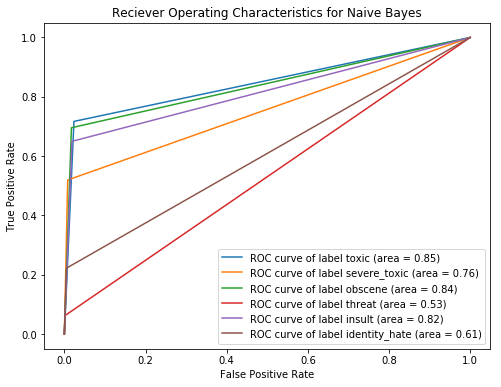

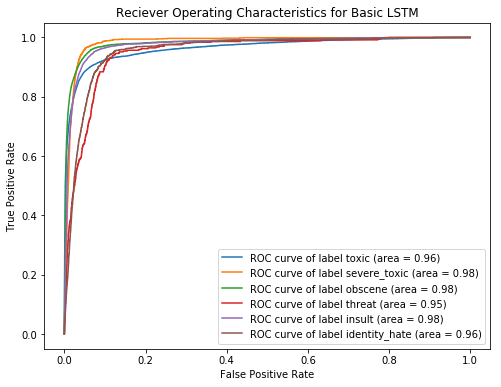

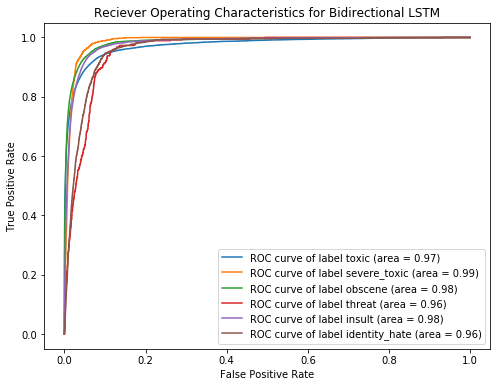

In [92]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

%matplotlib inline

# Create a graph for each model
for name,prediction_df in models.items():
    
    plt.figure(figsize=(8, 6))
    
    # Create a line for each label's ROC
    for label in labels:
        fpr, tpr, thresholds = roc_curve(test[label], prediction_df[label])
        label_roc_auc = auc(fpr, tpr)
        graph_label = 'ROC curve of label {0} (area = {1:0.2f})'.format(label, label_roc_auc)
        plt.plot(fpr, tpr, label = graph_label)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.title('Reciever Operating Characteristics for {}'.format(name))
    plt.legend(loc="lower right")
    plt.show()